**Weather Prediction using Random Forest Algorithm**





**Imports**

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from IPython.display import Image 
import io
from sklearn import tree
import pydotplus
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import graphviz
import pydotplus
import io
from scipy import misc
%matplotlib inline

**Reading Dataset**

Using 'Pandas' we are reading the dataset. The dataset is collected from kaggle. It contains weather history of Bangladesh from 1901 to 2015. It consists four column [tem, Month, Year, rain] and 1380 Rows.

In [19]:
data = pd.read_csv('Temp_and_rain.csv')
print(data.head(3), '\n...\n...\n...\n',data.tail(2))


       tem  Month  Year     rain
0  16.9760      1  1901  18.5356
1  19.9026      2  1901  16.2548
2  24.3158      3  1901  70.7981 
...
...
...
           tem  Month  Year     rain
1378  23.1842     11  2015  4.60815
1379  18.7124     12  2015  5.97798


**Created two separate list**

Two list created temp and rain containing temperature data and rainfall data. These two will be used to calculate weather type.

In [20]:
temp = data['tem']
rain = data['rain']

**Creating categorical values**

Bangladesh's climate is **Tropican Savanna** region. According to **Kopper classification**. **Average Temperature** is around **18°C to 29°C** per year. **Average Rainfall** is around **750 mm to 1270 mm** per year. We slightly changed the parameters and created a few categories. 

In [21]:
weather = []
for t,r in zip(temp, rain):
  if t >=18 and t <=25:
    if r >=63 and r<=105:
      weather.append('Normal Normal')
    elif r >105 :
      weather.append('Normal Wet')
    elif r <63:
      weather.append('Normal Dry')
  elif t<18:
    if r >=16.5 and r<=17.5:
      weather.append('Cold Normal')
    elif r >17.5 :
      weather.append('Cold Wet')
    elif r <16.5:
      weather.append('Cold Dry')
  elif t>25:
    if r >=63 and r<=105:
      weather.append('Warm Normal')
    elif r >105 :
      weather.append('Warm Wet')
    elif r <63:
      weather.append('Warm Dry')
print('Size of weather:',len(weather))

Size of weather: 1380


**Creating 'Weather' column**

As we have already made a list of categorical values, we added a column using the list in our dataset.

In [22]:
data['weather'] = weather
data.head()

,tem,Month,Year,rain,weather
0,16.9760,1,1901,18.5356,Cold Wet
1,19.9026,2,1901,16.2548,Normal Dry
2,24.3158,3,1901,70.7981,Normal Normal
3,28.1834,4,1901,66.1616,Warm Normal
4,27.8892,5,1901,267.2150,Warm Wet


**Viewing number of data per category**

In [23]:
print('Number of Normal Normal Weather: ',data[['weather']].query("weather == 'Normal Normal'").count())
print('Number of Normal Wet Weather: ',data[['weather']].query("weather == 'Normal Wet'").count())
print('Number of Normal Dry Weahter: ',data[['weather']].query("weather == 'Normal Dry'").count())

print('Number of Cold Normal Weather: ',data[['weather']].query("weather == 'Cold Normal'").count())
print('Number of Cold Wet Weather: ',data[['weather']].query("weather == 'Cold Wet'").count())
print('Number of Cold Dry Weahter: ',data[['weather']].query("weather == 'Cold Dry'").count())

print('Number of Warm Normal Weather: ',data[['weather']].query("weather == 'Warm Normal'").count())
print('Number of Warm Wet Weather: ',data[['weather']].query("weather == 'Warm Wet'").count())
print('Number of Warm Dry Weahter: ',data[['weather']].query("weather == 'Warm Dry'").count())

Number of Normal Normal Weather:  weather    24
dtype: int64
Number of Normal Wet Weather:  weather    13
dtype: int64
Number of Normal Dry Weahter:  weather    424
dtype: int64
Number of Cold Normal Weather:  weather    1
dtype: int64
Number of Cold Wet Weather:  weather    5
dtype: int64
Number of Cold Dry Weahter:  weather    43
dtype: int64
Number of Warm Normal Weather:  weather    57
dtype: int64
Number of Warm Wet Weather:  weather    741
dtype: int64
Number of Warm Dry Weahter:  weather    72
dtype: int64


**Making the 'features' list:**

In [24]:
features = data.columns
features = [x for x in features if x != 'weather']
features
class_names = ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry']

**Splitting data in Train and test sets:**

For training the model and testing it, data is split in 80:20 ratio among train and test sets. We can view the number data in train and test set.



In [25]:
train, test = train_test_split(data, test_size = 0.20, shuffle = 'True')
print('Total Data: ', len(data))
print('Data in Train Set: ',len(train))
print('Data in Test Set: ',len(test))

Total Data:  1380
Data in Train Set:  1104
Data in Test Set:  276


**Creating x_train, y_train, x_test, y_test datasets:**

In [26]:
x_train = train[features]
y_train = train["weather"]

x_test = test[features]
y_test = test["weather"]

**Applying Random Forest:**

Random Forest is used. Number of estimators is 80, max depth = 4 and random state is set to 0

In [9]:
RF = RandomForestClassifier(n_estimators=80, max_depth= 4, random_state=0)

**Fitting the Random Forest Model:**

In [11]:
RF = RF.fit(x_train, y_train)

**Prediction the value of y using Random Forest Model:**

*   List item
*   List item



In [12]:
y_pred = RF.predict(x_test)

**We can see the predicted data here:**

In [13]:
print('Prediction data:\n', y_pred)

Prediction data:
 ['Warm Wet' 'Warm Dry' 'Normal Dry' 'Warm Normal' 'Normal Dry'
 'Normal Dry' 'Warm Wet' 'Warm Wet' 'Normal Dry' 'Normal Dry' 'Normal Dry'
 'Warm Wet' 'Cold Dry' 'Warm Wet' 'Warm Wet' 'Normal Dry' 'Warm Wet'
 'Warm Wet' 'Warm Wet' 'Normal Wet' 'Warm Wet' 'Warm Wet' 'Warm Wet'
 'Normal Dry' 'Warm Wet' 'Warm Wet' 'Warm Wet' 'Warm Wet' 'Warm Wet'
 'Warm Wet' 'Normal Dry' 'Warm Wet' 'Warm Wet' 'Normal Dry' 'Normal Wet'
 'Normal Dry' 'Warm Wet' 'Warm Wet' 'Warm Wet' 'Warm Wet' 'Warm Wet'
 'Warm Wet' 'Warm Wet' 'Warm Wet' 'Warm Wet' 'Normal Dry' 'Warm Wet'
 'Warm Wet' 'Normal Dry' 'Warm Wet' 'Normal Dry' 'Normal Dry' 'Warm Wet'
 'Normal Wet' 'Warm Wet' 'Warm Wet' 'Warm Wet' 'Warm Wet' 'Warm Dry'
 'Warm Wet' 'Warm Wet' 'Normal Dry' 'Warm Wet' 'Normal Dry' 'Warm Wet'
 'Normal Dry' 'Normal Dry' 'Warm Wet' 'Warm Wet' 'Warm Wet' 'Normal Dry'
 'Warm Wet' 'Warm Wet' 'Normal Dry' 'Warm Dry' 'Warm Dry' 'Warm Wet'
 'Warm Wet' 'Normal Dry' 'Cold Dry' 'Warm Wet' 'Warm Wet' 'Warm Wet'
 '

**Calcultaing Accuracy of the model:**

In [14]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier: ", round(score, 1), "%" )

Accuracy using Random Forest Classifier:  99.6 %


**Confusing Matrix:**

Here we see that Hot and Normal Weathers are predicted perfectly, where the Cold weather is not perfectly predicted.

In [15]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred, 
                            labels = ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry'],
                            normalize='pred')
print(conf_mat)

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.16666667
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.83333333
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.        ]]


**Confusion Matrix Heatmap:**


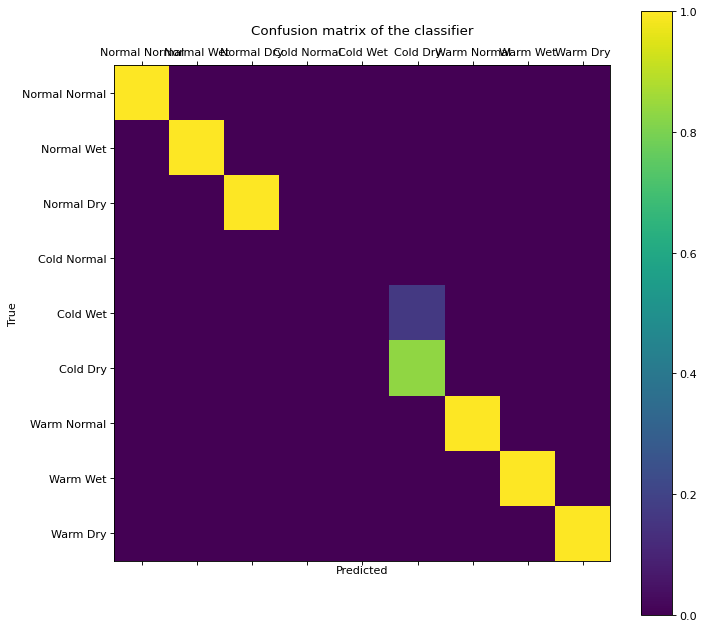

In [16]:
fig = plt.figure(figsize=(10,10), dpi =80)
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry'])
ax.set_yticklabels([''] + ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**A Decision tree in Random Forest:**

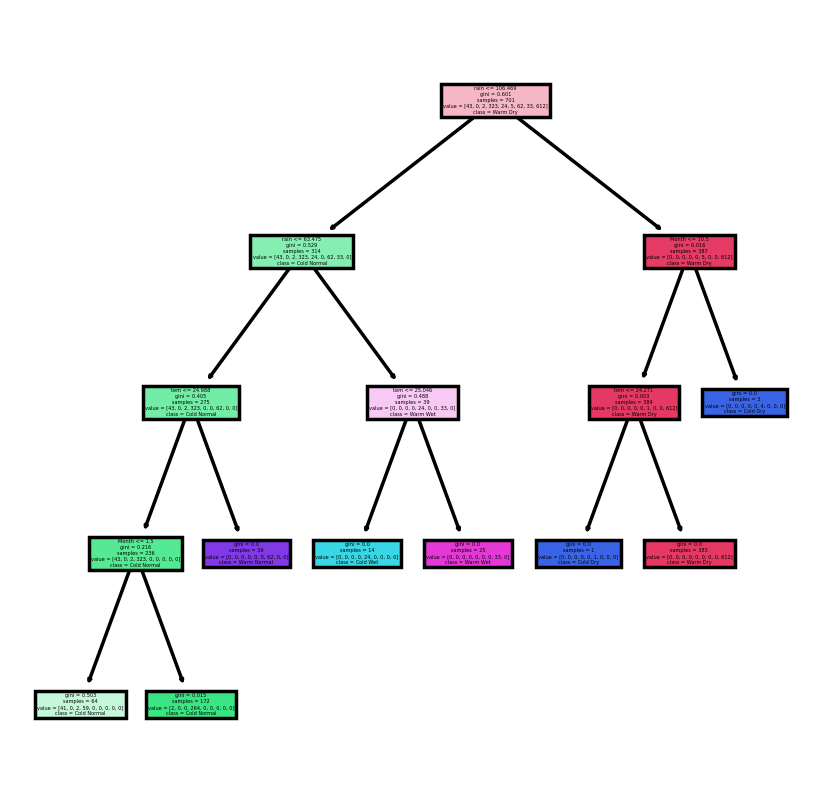

In [30]:
plt.figure(figsize= (4,4), dpi = 250)
_ = tree.plot_tree(RF.estimators_[5],
               feature_names = features, 
               class_names= class_names,
               filled = True);